# Инициализация

In [1]:
from interpolation import *

In [2]:
styles = {
    0: {
        'color': 'blue',
        'linestyle': '-',
    },
    1: {
        'color': 'green',
        'linestyle': '--',
    },
    2: {
        'color': 'red',
        'linestyle': ':',
    },
    3:{
        'color': 'purple',
        'linestyle': '-.',
    }
}

In [3]:
itr = Interpolator()
# points = [
#     (0.172, -7.057),
#     (0.567, -5.703),
#     (1.113, -0.132),
#     (2.119, 1.423),
#     (2.796, 2.832)
# ]
# x = np.arange(0.172, 2.796 + 0.01, 0.3) 

points = [
    (0.351, -0.572),
    (0.867, -2.015),
    (3.315, -3.342),
    (5.013, -5.752),
    (6.432, -6.911)
]
x = np.arange(0.351, 6.432, 0.001)

itr.load_points(points)
graphic = lambda X, Y, names: itr.show_graph(X, Y, names, styles = styles)

## Полином Лагранжа

L4(x)=
-0.0132*(x - 0.867)*(x - 3.315)*(x - 5.013)*(x - 6.432)
+0.0691*(x - 0.351)*(x - 3.315)*(x - 5.013)*(x - 6.432)
+-0.087*(x - 0.351)*(x - 0.867)*(x - 5.013)*(x - 6.432)
+0.1235*(x - 0.351)*(x - 0.867)*(x - 3.315)*(x - 6.432)
+-0.0462*(x - 0.351)*(x - 0.867)*(x - 3.315)*(x - 5.013)


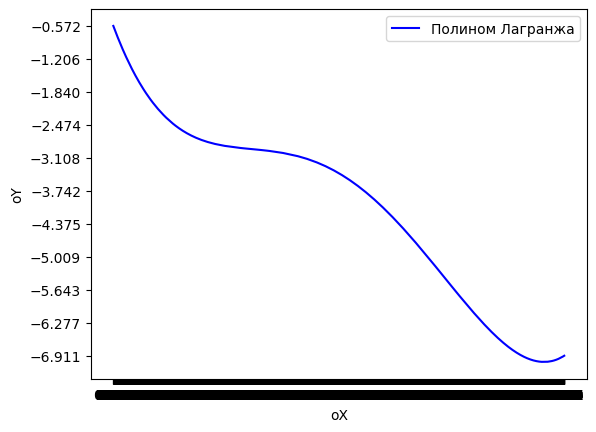

In [4]:
lagrange_view, lagrange_func = itr.build_lagrange()
print(lagrange_view)
l_y = [lagrange_func(x) for x in x]
graphic(x, [l_y], ["Полином Лагранжа"])

## Конечные и разделенные разности

In [5]:
itr.show_final_diffs(4)

+-------------------------------------------+
|         Таблица конечных разностей        |
+--------+--------+--------+--------+-------+
|   0    |   1    |   2    |   3    |   4   |
+--------+--------+--------+--------+-------+
| -0.572 | -1.443 | 0.116  | -1.199 | 3.533 |
| -2.015 | -1.327 | -1.083 | 2.334  |  0.0  |
| -3.342 | -2.41  | 1.251  |  0.0   |  0.0  |
| -5.752 | -1.159 |  0.0   |  0.0   |  0.0  |
| -6.911 |  0.0   |  0.0   |  0.0   |  0.0  |
+--------+--------+--------+--------+-------+


In [6]:
itr.show_divided_diffs(4)

+-----------------------------------------------+
|         Таблица разделенных разностей         |
+--------+---------+---------+---------+--------+
|   0    |    1    |    2    |    3    |   4    |
+--------+---------+---------+---------+--------+
| -0.572 | -2.7965 |  0.7606 | -0.2085 | 0.0463 |
| -2.015 | -0.5421 | -0.2116 |  0.0728 |  0.0   |
| -3.342 | -1.4193 |  0.1933 |   0.0   |  0.0   |
| -5.752 | -0.8168 |   0.0   |   0.0   |  0.0   |
| -6.911 |   0.0   |   0.0   |   0.0   |  0.0   |
+--------+---------+---------+---------+--------+


## Полином Ньютона

N4(x)=
-0.572
+-2.7965(x - 0.351)
+0.7606(x - 0.351)*(x - 0.867)
+-0.2085(x - 0.351)*(x - 0.867)*(x - 3.315)
+0.0463(x - 0.351)*(x - 0.867)*(x - 3.315)*(x - 5.013)


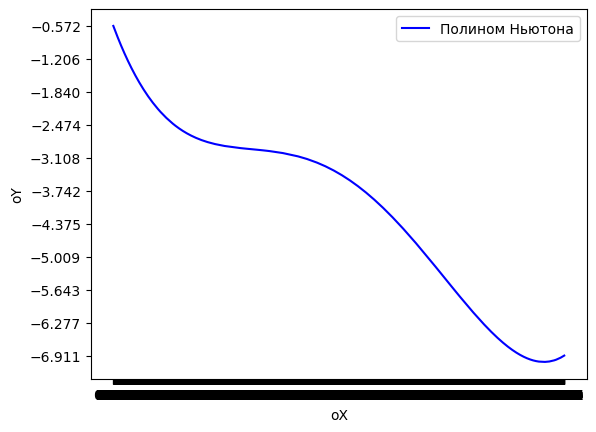

In [7]:
newton_view, newton_func = itr.build_newton()
print(newton_view)
n_y = [newton_func(x) for x in x]
graphic(x, [n_y], ["Полином Ньютона"])

## Линейный сплайн

F(x)=
-2.7965x + 0.4096, 0.351 <= x <= 0.867
-0.5421x + -1.545, 0.867 <= x <= 3.315
-1.4193x + 1.363, 3.315 <= x <= 5.013
-0.8168x + -1.6575, 5.013 <= x <= 6.432


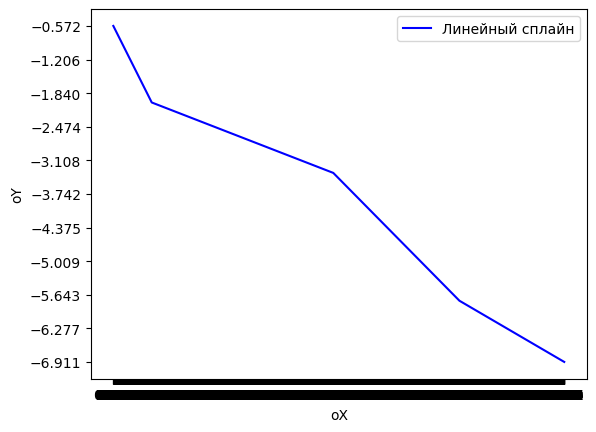

In [8]:
view, lin_spline_func = itr.build_linear_spline()
print(view)
ls_y = [lin_spline_func(x) for x in x]
graphic(x, [ls_y], ["Линейный сплайн"])

## Квадратичный сплайн

F(x)=
0.7606x^2 + -3.7229x + 0.641, 0.351 <= x <= 3.315
0.1933x^2 + -3.0292x + 4.5755, 3.315 <= x <= 6.432


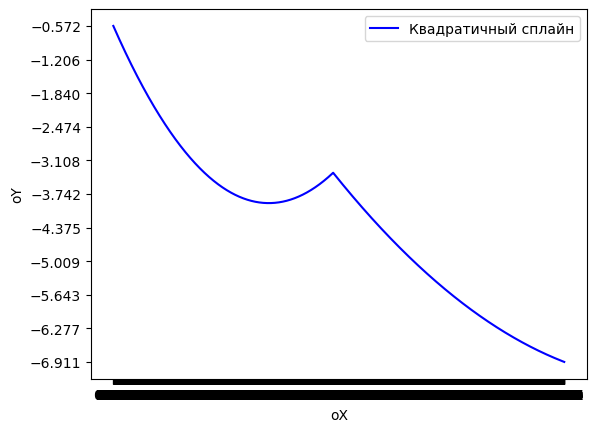

In [9]:
view, quad_spline_func = itr.build_quadratic_spline()
print(view)
qs_y = [quad_spline_func(x) for x in x]
graphic(x, [qs_y], ["Квадратичный сплайн"])

## Графики

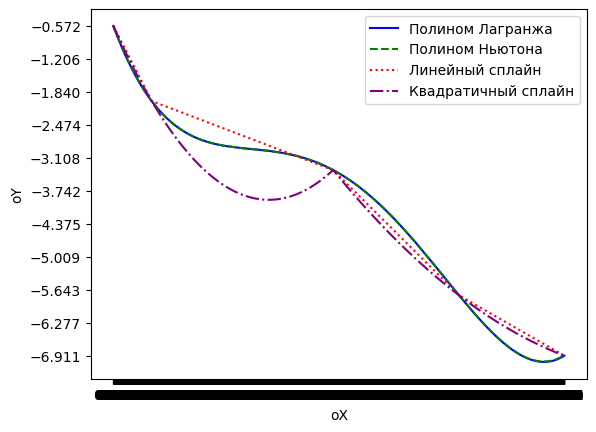

In [10]:
graphic(
    x,
    [l_y, n_y, ls_y, qs_y],
    ["Полином Лагранжа", "Полином Ньютона", "Линейный сплайн", "Квадратичный сплайн"]
)